In [1]:
import sqlite3
import datetime as dt

In [2]:
file = open("C:\\DataSets\\OnlineRetail2Sample.csv")
data1 = file.readlines()
data = data1[1:]

In [3]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

Opened database successfully


In [158]:
conn.execute('''CREATE TABLE RFMDM_TEMP (
    InvoiceNo   CHAR (20),
    StockCode   CHAR (20),
    Quantity    INTEGER,
    DoP         DATE,
    UnitPrice   FLOAT,
    CustomerID  CHAR (30));''')
print ("Table created successfully")

#conn.close()

Table created successfully


In [163]:
for row in data:
    #iData = data[row].split(sep = ",")
    iData = row.split(sep = ",")
    #print(iData)
    InvoiceNo = iData[0]
    StockCode = iData[1]
    Quantity = iData[2]
    DoP = iData[3]
    UnitPrice = iData[4]
    CustomerID = iData[5]

    #print(InvoiceNo, StockCode, Quantity, DoP, UnitPrice, CustomerID)

    #sql = 'INSERT INTO RFMDM (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
    #      VALUES (' + 536365 , 71053, 6, \'12/1/2010\', 3.39, 17850)"

    sql = "INSERT INTO RFMDM_TEMP (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
          VALUES (" + "\'" + InvoiceNo + "\',\'"+ StockCode + "\',"+ Quantity  + ','+ "\'" + DoP + "\'" +','+ UnitPrice +',' + CustomerID + " )"
    #print(sql)
    conn.execute(sql)
conn.commit()    
conn.close()
print("Commit successful")

Commit successful


In [4]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMDM_TEMP limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('536365', '85123A', 6, '12/1/2010', 2.55, '17850'), ('536365', '71053', 6, '12/1/2010', 3.39, '17850'), ('536365', '84406B', 8, '12/1/2010', 2.75, '17850'), ('536365', '84029G', 6, '12/1/2010', 3.39, '17850'), ('536365', '84029E', 6, '12/1/2010', 3.39, '17850')]


#data cleaning
#Run delete query in the table rfmdm
select count(*) from RFMDM_TEMP
-- 406829

select count(*) from RFMDM_TEMP where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')

--1920

delete from rfmdm where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')
select count(*) from RFMDM_TEMP where Quantity<0

--8359 (2%)

delete from RFMDM_TEMP where quantity <0

In [5]:
import pandas as pd

In [6]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmdm = pd.read_sql("select * from RFMDM_TEMP",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [7]:
rfmdm.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID
0,536365,85123A,6,12/1/2010,2.55,17850
1,536365,71053,6,12/1/2010,3.39,17850
2,536365,84406B,8,12/1/2010,2.75,17850
3,536365,84029G,6,12/1/2010,3.39,17850
4,536365,84029E,6,12/1/2010,3.39,17850


In [8]:
rfmdm.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
DoP            object
UnitPrice     float64
CustomerID     object
dtype: object

In [9]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select count(*) from RFMDM_TEMP")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(396370,)]


In [10]:
rfmdm['DoP'] = pd.to_datetime(rfmdm['DoP'])
print("Converted successfully")

Converted successfully


In [11]:
rfmdm.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
DoP           datetime64[ns]
UnitPrice            float64
CustomerID            object
dtype: object

In [ ]:
#Fix datetime format issue and create the new table RFMDM with dateformat fixed

In [41]:
rfmdm['Year'] = rfmdm['DoP'].dt.year
rfmdm['Month'] = rfmdm['DoP'].dt.month
rfmdm['TM_Id'] = rfmdm['Year'].astype(str) + '_' + rfmdm['Month'].astype(str)
rfmdm.tail()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Year,Month,TM_Id
396365,581587,22613,12,2011-12-09,0.85,12680,2011,12,2011_12
396366,581587,22899,6,2011-12-09,2.10,12680,2011,12,2011_12
396367,581587,23254,4,2011-12-09,4.15,12680,2011,12,2011_12
396368,581587,23255,4,2011-12-09,4.15,12680,2011,12,2011_12
396369,581587,22138,3,2011-12-09,4.95,12680,2011,12,2011_12


In [39]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE RFMDM''')
conn.commit()
rfmdm.to_sql('RFMDM',conn,if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [40]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMDM limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(0, '536365', '85123A', 6, '2010-12-01 00:00:00', 2.55, '17850', 2010, 12, '2010_12'), (1, '536365', '71053', 6, '2010-12-01 00:00:00', 3.39, '17850', 2010, 12, '2010_12'), (2, '536365', '84406B', 8, '2010-12-01 00:00:00', 2.75, '17850', 2010, 12, '2010_12'), (3, '536365', '84029G', 6, '2010-12-01 00:00:00', 3.39, '17850', 2010, 12, '2010_12'), (4, '536365', '84029E', 6, '2010-12-01 00:00:00', 3.39, '17850', 2010, 12, '2010_12')]


In [54]:
rfmdm_2010 = rfmdm.loc[cardm_monthly['Year'] == 2010]
rfmdm_2010.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Year,Month,TM_Id
0,536365,85123A,6,2010-12-01,2.55,17850,2010,12,2010_12
1,536365,71053,6,2010-12-01,3.39,17850,2010,12,2010_12
2,536365,84406B,8,2010-12-01,2.75,17850,2010,12,2010_12
3,536365,84029G,6,2010-12-01,3.39,17850,2010,12,2010_12
4,536365,84029E,6,2010-12-01,3.39,17850,2010,12,2010_12


In [55]:
rfmdm_2011 = rfmdm.loc[cardm_monthly['Year'] == 2011]
rfmdm_2011.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Year,Month,TM_Id
26059,539993,22386,10,2011-01-04,1.95,13313,2011,1,2011_1
26060,539993,21499,25,2011-01-04,0.42,13313,2011,1,2011_1
26061,539993,21498,25,2011-01-04,0.42,13313,2011,1,2011_1
26062,539993,22379,5,2011-01-04,2.10,13313,2011,1,2011_1
26063,539993,20718,10,2011-01-04,1.25,13313,2011,1,2011_1


In [56]:
print(max(rfmdm_2010['DoP']))
print(min(rfmdm_2010['DoP']))
#max(rfmdm['DoP'])

2010-12-23 00:00:00
2010-12-01 00:00:00


In [57]:
print(max(rfmdm_2011['DoP']))
print(min(rfmdm_2011['DoP']))

2011-12-09 00:00:00
2011-01-04 00:00:00


In [59]:
rfmdm_2010_12 = rfmdm_2010.loc[rfmdm_2010.Month == 12]
rfmdm_2010_12.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Year,Month,TM_Id
0,536365,85123A,6,2010-12-01,2.55,17850,2010,12,2010_12
1,536365,71053,6,2010-12-01,3.39,17850,2010,12,2010_12
2,536365,84406B,8,2010-12-01,2.75,17850,2010,12,2010_12
3,536365,84029G,6,2010-12-01,3.39,17850,2010,12,2010_12
4,536365,84029E,6,2010-12-01,3.39,17850,2010,12,2010_12


In [60]:
rfmdm_2011_1 = rfmdm_2011.loc[rfmdm_2011.Month == 1]
rfmdm_2011_2 = rfmdm_2011.loc[rfmdm_2011.Month == 2]
rfmdm_2011_3 = rfmdm_2011.loc[rfmdm_2011.Month == 3]
rfmdm_2011_4 = rfmdm_2011.loc[rfmdm_2011.Month == 4]
rfmdm_2011_5 = rfmdm_2011.loc[rfmdm_2011.Month == 5]
rfmdm_2011_6 = rfmdm_2011.loc[rfmdm_2011.Month == 6]
rfmdm_2011_7 = rfmdm_2011.loc[rfmdm_2011.Month == 7]
rfmdm_2011_8 = rfmdm_2011.loc[rfmdm_2011.Month == 8]
rfmdm_2011_9 = rfmdm_2011.loc[rfmdm_2011.Month == 9]
rfmdm_2011_10 = rfmdm_2011.loc[rfmdm_2011.Month == 10]
rfmdm_2011_11 = rfmdm_2011.loc[rfmdm_2011.Month == 11]
rfmdm_2011_12 = rfmdm_2011.loc[rfmdm_2011.Month == 12]

In [61]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
#cursor = conn.cursor()
#cursor.execute('''DROP TABLE RFMSEG''')
#conn.commit()
rfmdm_2010_12.to_sql('RFMDM_2010_12',conn, if_exists = 'replace')
print ("new table RFMDM_2010_12 got created successfully")
rfmdm_2011_1.to_sql('RFMDM_2011_1',conn, if_exists = 'replace')
print ("new table RFMDM_2011_1 got created successfully")
rfmdm_2011_2.to_sql('RFMDM_2011_2',conn, if_exists = 'replace')
print ("new table RFMDM_2011_2 got created successfully")
rfmdm_2011_3.to_sql('RFMDM_2011_3',conn, if_exists = 'replace')
print ("new table RFMDM_2011_3 got created successfully")
rfmdm_2011_4.to_sql('RFMDM_2011_4',conn, if_exists = 'replace')
print ("new table RFMDM_2011_4 got created successfully")
rfmdm_2011_5.to_sql('RFMDM_2011_5',conn, if_exists = 'replace')
print ("new table RFMDM_2011_5 got created successfully")
rfmdm_2011_6.to_sql('RFMDM_2011_6',conn, if_exists = 'replace')
print ("new table RFMDM_2011_6 got created successfully")
rfmdm_2011_7.to_sql('RFMDM_2011_7',conn, if_exists = 'replace')
print ("new table RFMDM_2011_7 got created successfully")
rfmdm_2011_8.to_sql('RFMDM_2011_8',conn, if_exists = 'replace')
print ("new table RFMDM_2011_8 got created successfully")
rfmdm_2011_9.to_sql('RFMDM_2011_9',conn, if_exists = 'replace')
print ("new table RFMDM_2011_9 got created successfully")
rfmdm_2011_10.to_sql('RFMDM_2011_10',conn, if_exists = 'replace')
print ("new table RFMDM_2011_10 got created successfully")
rfmdm_2011_11.to_sql('RFMDM_2011_11',conn, if_exists = 'replace')
print ("new table RFMDM_2011_11 got created successfully")
rfmdm_2011_12.to_sql('RFMDM_2011_12',conn, if_exists = 'replace')
print ("new table RFMDM_2011_12 got created successfully")
conn.close()

Opened database successfully
new table RFMDM_2010_12 got created successfully
new table RFMDM_2011_1 got created successfully
new table RFMDM_2011_2 got created successfully
new table RFMDM_2011_3 got created successfully
new table RFMDM_2011_4 got created successfully
new table RFMDM_2011_5 got created successfully
new table RFMDM_2011_6 got created successfully
new table RFMDM_2011_7 got created successfully
new table RFMDM_2011_8 got created successfully
new table RFMDM_2011_9 got created successfully
new table RFMDM_2011_10 got created successfully
new table RFMDM_2011_11 got created successfully
new table RFMDM_2011_12 got created successfully


In [ ]:
#create the following tables in sql 
RFMSEG_TEMP_2010_12,RFMSEG_TEMP_2011_1,RFMSEG_TEMP_2011_2,RFMSEG_TEMP_2011_3,RFMSEG_TEMP_2011_4,
RFMSEG_TEMP_2011_5,RFMSEG_TEMP_2011_6,RFMSEG_TEMP_2011_7,RFMSEG_TEMP_2011_8,RFMSEG_TEMP_2011_9,
RFMSEG_TEMP_2011_10,RFMSEG_TEMP_2011_11,RFMSEG_TEMP_2011_12
e.g.
CREATE TABLE RFMSEG_TEMP_2011_12 (
    CustomerID  CHAR (20),
    RDate   DATE,
    Frequency    INTEGER,
    Product INTEGER,
    TDate         DATE,
    Monetary   FLOAT)


#run the following sql queries to create records in segtemp tables

insert into RFMSEG_TEMP_2010_12
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2010_12
       group by customerid

insert into RFMSEG_TEMP_2011_1
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_1
       group by customerid

insert into RFMSEG_TEMP_2011_2
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_2
       group by customerid

insert into RFMSEG_TEMP_2011_3
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_3
       group by customerid

insert into RFMSEG_TEMP_2011_4
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_4
       group by customerid

insert into RFMSEG_TEMP_2011_5
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_5
       group by customerid

insert into RFMSEG_TEMP_2011_6
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_6
       group by customerid

insert into RFMSEG_TEMP_2011_7
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_7
       group by customerid

insert into RFMSEG_TEMP_2011_8
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_8
       group by customerid

insert into RFMSEG_TEMP_2011_9
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_9
       group by customerid

insert into RFMSEG_TEMP_2011_10
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_10
       group by customerid

insert into RFMSEG_TEMP_2011_11
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_11
       group by customerid

insert into RFMSEG_TEMP_2011_12
SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_2011_12
       group by customerid

#create the new colums Recency and Tenure in the tables
RFMSEG_TEMP_2010_12,RFMSEG_TEMP_2011_1,RFMSEG_TEMP_2011_2,RFMSEG_TEMP_2011_3,RFMSEG_TEMP_2011_4,
RFMSEG_TEMP_2011_5,RFMSEG_TEMP_2011_6,RFMSEG_TEMP_2011_7,RFMSEG_TEMP_2011_8,RFMSEG_TEMP_2011_9,
RFMSEG_TEMP_2011_10,RFMSEG_TEMP_2011_11,RFMSEG_TEMP_2011_12

alter table RFMSEG_TEMP_2010_12
add column Tenure Integer

alter table RFMSEG_TEMP_2011_1
add column Tenure Integer

alter table RFMSEG_TEMP_2011_2
add column Tenure Integer

alter table RFMSEG_TEMP_2011_3
add column Tenure Integer

alter table RFMSEG_TEMP_2011_4
add column Tenure Integer

alter table RFMSEG_TEMP_2011_5
add column Tenure Integer

alter table RFMSEG_TEMP_2011_6
add column Tenure Integer

alter table RFMSEG_TEMP_2011_7
add column Tenure Integer

alter table RFMSEG_TEMP_2011_8
add column Tenure Integer

alter table RFMSEG_TEMP_2011_9
add column Tenure Integer

alter table RFMSEG_TEMP_2011_10
add column Tenure Integer

alter table RFMSEG_TEMP_2011_11
add column Tenure Integer

alter table RFMSEG_TEMP_2011_12
add column Tenure Integer

alter table RFMSEG_TEMP_2010_12
add column Recency Integer

alter table RFMSEG_TEMP_2011_1
add column Recency Integer

alter table RFMSEG_TEMP_2011_2
add column Recency Integer

alter table RFMSEG_TEMP_2011_3
add column Recency Integer

alter table RFMSEG_TEMP_2011_4
add column Recency Integer

alter table RFMSEG_TEMP_2011_5
add column Recency Integer

alter table RFMSEG_TEMP_2011_6
add column Recency Integer

alter table RFMSEG_TEMP_2011_7
add column Recency Integer

alter table RFMSEG_TEMP_2011_8
add column Recency Integer

alter table RFMSEG_TEMP_2011_9
add column Recency Integer

alter table RFMSEG_TEMP_2011_10
add column Recency Integer

alter table RFMSEG_TEMP_2011_11
add column Recency Integer

alter table RFMSEG_TEMP_2011_12
add column Recency Integer


In [66]:
#create the dataframes
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg_temp_2010_12 = pd.read_sql("select * from RFMSEG_TEMP_2010_12",conn)
rfmseg_temp_2011_1 = pd.read_sql("select * from RFMSEG_TEMP_2011_1",conn)
rfmseg_temp_2011_2 = pd.read_sql("select * from RFMSEG_TEMP_2011_2",conn)
rfmseg_temp_2011_3 = pd.read_sql("select * from RFMSEG_TEMP_2011_3",conn)
rfmseg_temp_2011_4 = pd.read_sql("select * from RFMSEG_TEMP_2011_4",conn)
rfmseg_temp_2011_5 = pd.read_sql("select * from RFMSEG_TEMP_2011_5",conn)
rfmseg_temp_2011_6 = pd.read_sql("select * from RFMSEG_TEMP_2011_6",conn)
rfmseg_temp_2011_7 = pd.read_sql("select * from RFMSEG_TEMP_2011_7",conn)
rfmseg_temp_2011_8 = pd.read_sql("select * from RFMSEG_TEMP_2011_8",conn)
rfmseg_temp_2011_9 = pd.read_sql("select * from RFMSEG_TEMP_2011_9",conn)
rfmseg_temp_2011_10 = pd.read_sql("select * from RFMSEG_TEMP_2011_10",conn)
rfmseg_temp_2011_11 = pd.read_sql("select * from RFMSEG_TEMP_2011_11",conn)
rfmseg_temp_2011_12 = pd.read_sql("select * from RFMSEG_TEMP_2011_12",conn)
print ("records added to dataframe rfmseg* successfully")
conn.close()

Opened database successfully
records added to dataframe rfmseg* successfully


In [71]:
NOW_2010_12 = dt.datetime(2010,12,31)
rfmseg_temp_2010_12['NOW'] = NOW_2010_12
NOW_2011_1 = dt.datetime(2011,1,31)
rfmseg_temp_2011_1['NOW'] = NOW_2011_1
NOW_2011_2 = dt.datetime(2011,2,28)
rfmseg_temp_2011_2['NOW'] = NOW_2011_2
NOW_2011_3 = dt.datetime(2011,3,31)
rfmseg_temp_2011_3['NOW'] = NOW_2011_3
NOW_2011_4 = dt.datetime(2011,4,30)
rfmseg_temp_2011_4['NOW'] = NOW_2011_4
NOW_2011_5 = dt.datetime(2011,5,31)
rfmseg_temp_2011_5['NOW'] = NOW_2011_5
NOW_2011_6 = dt.datetime(2011,6,30)
rfmseg_temp_2011_6['NOW'] = NOW_2011_6
NOW_2011_7 = dt.datetime(2011,7,31)
rfmseg_temp_2011_7['NOW'] = NOW_2011_7
NOW_2011_8 = dt.datetime(2011,8,31)
rfmseg_temp_2011_8['NOW'] = NOW_2011_8
NOW_2011_9 = dt.datetime(2011,9,30)
rfmseg_temp_2011_9['NOW'] = NOW_2011_9
NOW_2011_10 = dt.datetime(2011,10,31)
rfmseg_temp_2011_10['NOW'] = NOW_2011_10
NOW_2011_11 = dt.datetime(2011,11,30)
rfmseg_temp_2011_11['NOW'] = NOW_2011_11
NOW_2011_12 = dt.datetime(2011,12,31)


In [72]:
rfmseg_temp_2011_12.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12347,2011-12-31,1,11,2011-12-07,224.82,None,None,2011-12-31
1,12358,2011-12-31,1,6,2011-12-08,523.20,None,None,2011-12-31
2,12362,2011-12-31,1,29,2011-12-06,475.04,None,None,2011-12-31
3,12364,2011-12-31,1,26,2011-12-02,295.32,None,None,2011-12-31
4,12367,2011-12-31,1,10,2011-12-05,150.90,None,None,2011-12-31


In [73]:
#convert to datetime format
#rfmseg['NOW'] = pd.to_datetime(rfmseg['NOW'])
rfmseg_temp_2010_12['TDate'] = pd.to_datetime(rfmseg_temp_2010_12['TDate'])
rfmseg_temp_2010_12['RDate'] = pd.to_datetime(rfmseg_temp_2010_12['RDate'])


rfmseg_temp_2011_1['TDate'] = pd.to_datetime(rfmseg_temp_2011_1['TDate'])
rfmseg_temp_2011_1['RDate'] = pd.to_datetime(rfmseg_temp_2011_1['RDate'])


rfmseg_temp_2011_2['TDate'] = pd.to_datetime(rfmseg_temp_2011_2['TDate'])
rfmseg_temp_2011_2['RDate'] = pd.to_datetime(rfmseg_temp_2011_2['RDate'])

rfmseg_temp_2011_3['TDate'] = pd.to_datetime(rfmseg_temp_2011_3['TDate'])
rfmseg_temp_2011_3['RDate'] = pd.to_datetime(rfmseg_temp_2011_3['RDate'])

rfmseg_temp_2011_4['TDate'] = pd.to_datetime(rfmseg_temp_2011_4['TDate'])
rfmseg_temp_2011_4['RDate'] = pd.to_datetime(rfmseg_temp_2011_4['RDate'])

rfmseg_temp_2011_5['TDate'] = pd.to_datetime(rfmseg_temp_2011_5['TDate'])
rfmseg_temp_2011_5['RDate'] = pd.to_datetime(rfmseg_temp_2011_5['RDate'])

rfmseg_temp_2011_6['TDate'] = pd.to_datetime(rfmseg_temp_2011_6['TDate'])
rfmseg_temp_2011_6['RDate'] = pd.to_datetime(rfmseg_temp_2011_6['RDate'])

rfmseg_temp_2011_7['TDate'] = pd.to_datetime(rfmseg_temp_2011_7['TDate'])
rfmseg_temp_2011_7['RDate'] = pd.to_datetime(rfmseg_temp_2011_7['RDate'])

rfmseg_temp_2011_8['TDate'] = pd.to_datetime(rfmseg_temp_2011_8['TDate'])
rfmseg_temp_2011_8['RDate'] = pd.to_datetime(rfmseg_temp_2011_8['RDate'])

rfmseg_temp_2011_9['TDate'] = pd.to_datetime(rfmseg_temp_2011_9['TDate'])
rfmseg_temp_2011_9['RDate'] = pd.to_datetime(rfmseg_temp_2011_9['RDate'])

rfmseg_temp_2011_10['TDate'] = pd.to_datetime(rfmseg_temp_2011_10['TDate'])
rfmseg_temp_2011_10['RDate'] = pd.to_datetime(rfmseg_temp_2011_10['RDate'])

rfmseg_temp_2011_11['TDate'] = pd.to_datetime(rfmseg_temp_2011_11['TDate'])
rfmseg_temp_2011_11['RDate'] = pd.to_datetime(rfmseg_temp_2011_11['RDate'])

rfmseg_temp_2011_12['TDate'] = pd.to_datetime(rfmseg_temp_2011_12['TDate'])
rfmseg_temp_2011_12['RDate'] = pd.to_datetime(rfmseg_temp_2011_12['RDate'])['NOW'] = NOW_2011_12

In [74]:
rfmseg_temp_2011_12.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12347,2011-12-31,1,11,2011-12-07,224.82,None,None,2011-12-31
1,12358,2011-12-31,1,6,2011-12-08,523.20,None,None,2011-12-31
2,12362,2011-12-31,1,29,2011-12-06,475.04,None,None,2011-12-31
3,12364,2011-12-31,1,26,2011-12-02,295.32,None,None,2011-12-31
4,12367,2011-12-31,1,10,2011-12-05,150.90,None,None,2011-12-31


In [86]:
rfmseg_temp_2010_12['Recency'] = (rfmseg_temp_2010_12['NOW'] - rfmseg_temp_2010_12['RDate']).dt.days
rfmseg_temp_2010_12['Tenure'] = (rfmseg_temp_2010_12['NOW'] - rfmseg_temp_2010_12['TDate']).dt.days

rfmseg_temp_2011_1['Recency'] = (rfmseg_temp_2011_1['NOW'] - rfmseg_temp_2011_1['RDate']).dt.days
rfmseg_temp_2011_1['Tenure'] = (rfmseg_temp_2011_1['NOW'] - rfmseg_temp_2011_1['TDate']).dt.days

rfmseg_temp_2011_2['Recency'] = (rfmseg_temp_2011_2['NOW'] - rfmseg_temp_2011_2['RDate']).dt.days
rfmseg_temp_2011_2['Tenure'] = (rfmseg_temp_2011_2['NOW'] - rfmseg_temp_2011_2['TDate']).dt.days

rfmseg_temp_2011_3['Recency'] = (rfmseg_temp_2011_3['NOW'] - rfmseg_temp_2011_3['RDate']).dt.days
rfmseg_temp_2011_3['Tenure'] = (rfmseg_temp_2011_3['NOW'] - rfmseg_temp_2011_3['TDate']).dt.days

rfmseg_temp_2011_4['Recency'] = (rfmseg_temp_2011_4['NOW'] - rfmseg_temp_2011_4['RDate']).dt.days
rfmseg_temp_2011_4['Tenure'] = (rfmseg_temp_2011_4['NOW'] - rfmseg_temp_2011_4['TDate']).dt.days

rfmseg_temp_2011_5['Recency'] = (rfmseg_temp_2011_5['NOW'] - rfmseg_temp_2011_5['RDate']).dt.days
rfmseg_temp_2011_5['Tenure'] = (rfmseg_temp_2011_5['NOW'] - rfmseg_temp_2011_5['TDate']).dt.days

rfmseg_temp_2011_6['Recency'] = (rfmseg_temp_2011_6['NOW'] - rfmseg_temp_2011_6['RDate']).dt.days
rfmseg_temp_2011_6['Tenure'] = (rfmseg_temp_2011_6['NOW'] - rfmseg_temp_2011_6['TDate']).dt.days

rfmseg_temp_2011_7['Recency'] = (rfmseg_temp_2011_7['NOW'] - rfmseg_temp_2011_7['RDate']).dt.days
rfmseg_temp_2011_7['Tenure'] = (rfmseg_temp_2011_7['NOW'] - rfmseg_temp_2011_7['TDate']).dt.days

rfmseg_temp_2011_8['Recency'] = (rfmseg_temp_2011_8['NOW'] - rfmseg_temp_2011_8['RDate']).dt.days
rfmseg_temp_2011_8['Tenure'] = (rfmseg_temp_2011_8['NOW'] - rfmseg_temp_2011_8['TDate']).dt.days

rfmseg_temp_2011_9['Recency'] = (rfmseg_temp_2011_9['NOW'] - rfmseg_temp_2011_9['RDate']).dt.days
rfmseg_temp_2011_9['Tenure'] = (rfmseg_temp_2011_9['NOW'] - rfmseg_temp_2011_9['TDate']).dt.days

rfmseg_temp_2011_10['Recency'] = (rfmseg_temp_2011_10['NOW'] - rfmseg_temp_2011_10['RDate']).dt.days
rfmseg_temp_2011_10['Tenure'] = (rfmseg_temp_2011_10['NOW'] - rfmseg_temp_2011_10['TDate']).dt.days

rfmseg_temp_2011_11['Recency'] = (rfmseg_temp_2011_11['NOW'] - rfmseg_temp_2011_11['RDate']).dt.days
rfmseg_temp_2011_11['Tenure'] = (rfmseg_temp_2011_11['NOW'] - rfmseg_temp_2011_11['TDate']).dt.days

rfmseg_temp_2011_12['Recency'] = (rfmseg_temp_2011_12['NOW'] - rfmseg_temp_2011_12['RDate']).dt.days
rfmseg_temp_2011_12['Tenure'] = (rfmseg_temp_2011_12['NOW'] - rfmseg_temp_2011_12['TDate']).dt.days

In [87]:
rfmseg_temp_2011_12.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12347,2011-12-31,1,11,2011-12-07,224.82,0,24,2011-12-31
1,12358,2011-12-31,1,6,2011-12-08,523.20,0,23,2011-12-31
2,12362,2011-12-31,1,29,2011-12-06,475.04,0,25,2011-12-31
3,12364,2011-12-31,1,26,2011-12-02,295.32,0,29,2011-12-31
4,12367,2011-12-31,1,10,2011-12-05,150.90,0,26,2011-12-31


In [88]:
del rfmseg_temp_2010_12['NOW']
del rfmseg_temp_2011_1['NOW']
del rfmseg_temp_2011_2['NOW']
del rfmseg_temp_2011_3['NOW']
del rfmseg_temp_2011_4['NOW']
del rfmseg_temp_2011_5['NOW']
del rfmseg_temp_2011_6['NOW']
del rfmseg_temp_2011_7['NOW']
del rfmseg_temp_2011_8['NOW']
del rfmseg_temp_2011_9['NOW']
del rfmseg_temp_2011_10['NOW']
del rfmseg_temp_2011_11['NOW']
del rfmseg_temp_2011_12['NOW']

In [89]:
rfmseg_temp_2011_9.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12348,2011-09-25,1,2,2011-09-25,270.00,5,5
1,12352,2011-09-28,2,26,2011-09-20,512.50,2,10
2,12362,2011-09-28,1,39,2011-09-28,769.99,2,2
3,12364,2011-09-22,1,1,2011-09-22,64.80,8,8
4,12372,2011-09-29,1,12,2011-09-29,353.12,1,1


In [92]:
#create CARDM monthly aggregates
cardm_2010_12 = rfmseg_temp_2010_12.copy()
cardm_2011_1 = rfmseg_temp_2011_1.copy()
cardm_2011_2 = rfmseg_temp_2011_2.copy()
cardm_2011_3 = rfmseg_temp_2011_3.copy()
cardm_2011_4 = rfmseg_temp_2011_4.copy()
cardm_2011_5 = rfmseg_temp_2011_5.copy()
cardm_2011_6 = rfmseg_temp_2011_6.copy()
cardm_2011_7 = rfmseg_temp_2011_7.copy()
cardm_2011_8 = rfmseg_temp_2011_8.copy()
cardm_2011_9 = rfmseg_temp_2011_9.copy()
cardm_2011_10 = rfmseg_temp_2011_10.copy()
cardm_2011_11 = rfmseg_temp_2011_11.copy()
cardm_2011_12 = rfmseg_temp_2011_12.copy()
cardm_2010_12.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12347,2010-12-07,1,31,2010-12-07,711.79,24,24
1,12348,2010-12-16,1,12,2010-12-16,652.80,15,15
2,12370,2010-12-17,2,89,2010-12-14,1748.02,14,17
3,12377,2010-12-20,1,43,2010-12-20,1001.52,11,11
4,12383,2010-12-22,1,36,2010-12-22,555.72,9,9


In [50]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
#cursor.execute('''DROP TABLE RFMSEG_TEMP''')
#conn.commit()
#conn.execute('''drop table rfmseg''')
conn.execute('''CREATE TABLE RFMSEG_TEMP (
    CustomerID  CHAR (20),
    RDate   DATE,
    Frequency    INTEGER,
    Product INTEGER,
    TDate         DATE,
    Monetary   FLOAT)''')
print ("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [ ]:
insert data into rfmseg table using the following sql command
    INSERT INTO RFMSEG_TEMP
       SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM
       group by customerid

In [203]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMSEG_TEMP limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('12346', '2011-01-18 00:00:00', 1, 1, '2011-01-18 00:00:00', 77183.6), ('12347', '2011-12-07 00:00:00', 7, 103, '2010-12-07 00:00:00', 4309.999999999997), ('12348', '2011-09-25 00:00:00', 4, 21, '2010-12-16 00:00:00', 1437.24), ('12349', '2011-11-21 00:00:00', 1, 72, '2011-11-21 00:00:00', 1457.55), ('12350', '2011-02-02 00:00:00', 1, 16, '2011-02-02 00:00:00', 294.40000000000003)]


In [204]:
print(max(rfmdm['DoP']))

2011-12-09 00:00:00


In [205]:
print(min(rfmdm['DoP']))

2010-12-01 00:00:00


In [206]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table RFMSEG_TEMP \
            add column Recency INTEGER \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table RFMSEG_TEMP             add column Recency INTEGER         
Column added successfully


In [207]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table RFMSEG_TEMP \
            add column Tenure INTEGER \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table RFMSEG_TEMP             add column Tenure INTEGER         
Column added successfully


In [208]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg = pd.read_sql("select * from RFMSEG_TEMP",conn)
print ("records added to dataframe rfmseg successfully")
conn.close()

Opened database successfully
records added to dataframe rfmseg successfully


In [209]:
rfmseg.head()
#print(rfmseg['Recency'])

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12346,2011-01-18 00:00:00,1,1,2011-01-18 00:00:00,77183.60,None,None
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00,None,None
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24,None,None
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55,None,None
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40,None,None


In [210]:

NOW = dt.datetime(2011,12,10)
print(NOW)

2011-12-10 00:00:00


In [211]:
rfmseg['NOW'] = NOW
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12346,2011-01-18 00:00:00,1,1,2011-01-18 00:00:00,77183.60,None,None,2011-12-10
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00,None,None,2011-12-10
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24,None,None,2011-12-10
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55,None,None,2011-12-10
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40,None,None,2011-12-10


In [212]:
rfmseg.dtypes

CustomerID            object
RDate                 object
Frequency              int64
Product                int64
TDate                 object
Monetary             float64
Recency               object
Tenure                object
NOW           datetime64[ns]
dtype: object

In [213]:
#convert to datetime format
#rfmseg['NOW'] = pd.to_datetime(rfmseg['NOW'])
rfmseg['TDate'] = pd.to_datetime(rfmseg['TDate'])
rfmseg['RDate'] = pd.to_datetime(rfmseg['RDate'])
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12346,2011-01-18,1,1,2011-01-18,77183.60,None,None,2011-12-10
1,12347,2011-12-07,7,103,2010-12-07,4310.00,None,None,2011-12-10
2,12348,2011-09-25,4,21,2010-12-16,1437.24,None,None,2011-12-10
3,12349,2011-11-21,1,72,2011-11-21,1457.55,None,None,2011-12-10
4,12350,2011-02-02,1,16,2011-02-02,294.40,None,None,2011-12-10


In [214]:
rfmseg.dtypes

CustomerID            object
RDate         datetime64[ns]
Frequency              int64
Product                int64
TDate         datetime64[ns]
Monetary             float64
Recency               object
Tenure                object
NOW           datetime64[ns]
dtype: object

In [215]:
rfmseg['Recency'] = (rfmseg['NOW'] - rfmseg['RDate']).dt.days
rfmseg['Tenure'] = (rfmseg['NOW'] - rfmseg['TDate']).dt.days
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12346,2011-01-18,1,1,2011-01-18,77183.60,326,326,2011-12-10
1,12347,2011-12-07,7,103,2010-12-07,4310.00,3,368,2011-12-10
2,12348,2011-09-25,4,21,2010-12-16,1437.24,76,359,2011-12-10
3,12349,2011-11-21,1,72,2011-11-21,1457.55,19,19,2011-12-10
4,12350,2011-02-02,1,16,2011-02-02,294.40,311,311,2011-12-10


In [216]:
del rfmseg['NOW']
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12346,2011-01-18,1,1,2011-01-18,77183.60,326,326
1,12347,2011-12-07,7,103,2010-12-07,4310.00,3,368
2,12348,2011-09-25,4,21,2010-12-16,1437.24,76,359
3,12349,2011-11-21,1,72,2011-11-21,1457.55,19,19
4,12350,2011-02-02,1,16,2011-02-02,294.40,311,311


In [220]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
#cursor = conn.cursor()
#cursor.execute('''DROP TABLE RFMSEG''')
#conn.commit()
rfmseg.to_sql('RFMSEG',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table RFMSEG got created successfully")
conn.close()

Opened database successfully
new table RFMSEG got created successfully


In [219]:
rfmseg.describe()

,Frequency,Product,Monetary,Recency,Tenure
count,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000
mean,4.245675,61.413149,2021.007301,93.208535,223.785928
std,7.636337,85.304170,8906.526607,100.170816,117.867218
min,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,16.000000,305.410000,18.000000,113.000000
50%,2.000000,35.000000,668.110000,51.000000,249.000000
75%,5.000000,77.000000,1631.475000,143.000000,327.000000
max,206.000000,1785.000000,279138.020000,374.000000,374.000000


In [27]:
rfmseg.shape

(4335, 8)

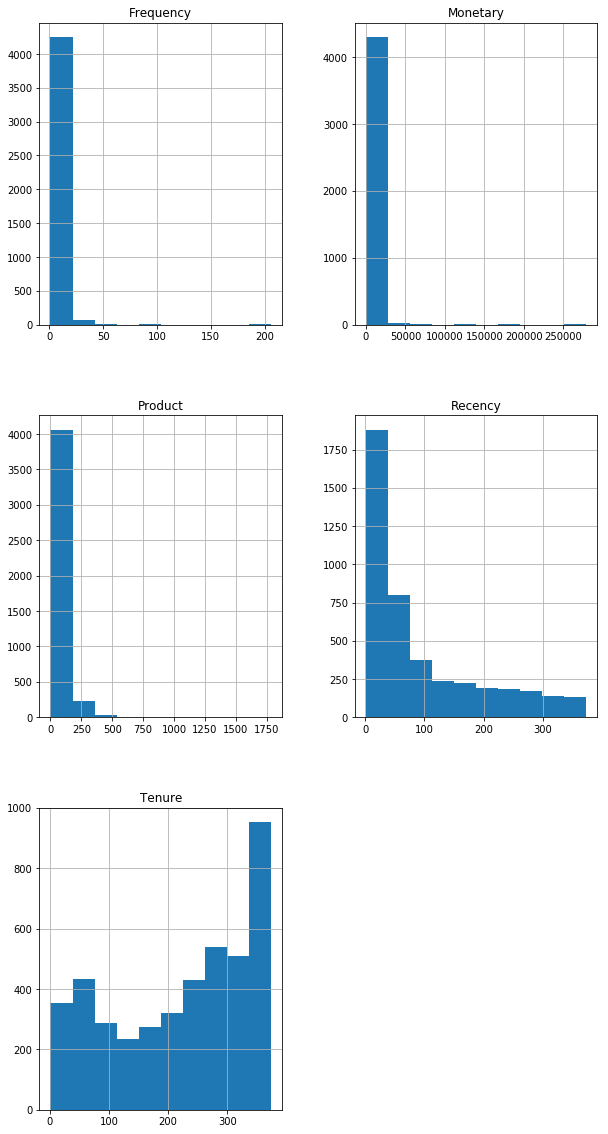

In [28]:
import matplotlib.pyplot as plt
rfmseg.hist(figsize = (10,20))
plt.show()

In [184]:
#plt.boxplot(rfmseg["Frequency"])
#plt.show()

In [19]:
rfmseg.describe()

,Frequency,Product,Monetary,Recency,Tenure
count,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000
mean,4.245675,61.413149,2021.007301,93.208535,223.785928
std,7.636337,85.304170,8906.526607,100.170816,117.867218
min,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,16.000000,305.410000,18.000000,113.000000
50%,2.000000,35.000000,668.110000,51.000000,249.000000
75%,5.000000,77.000000,1631.475000,143.000000,327.000000
max,206.000000,1785.000000,279138.020000,374.000000,374.000000


In [20]:
quantiles = rfmseg.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

,Frequency,Product,Monetary,Recency,Tenure
0.2,1.0,13.0,248.356,15.0,81.0
0.4,2.0,26.0,484.644,33.0,206.0
0.6,3.0,48.0,925.050,72.0,282.0
0.8,5.0,92.0,2043.328,180.0,354.0


In [21]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 5.0},
 'Monetary': {0.2: 248.356,
  0.4: 484.644,
  0.6: 925.0500000000001,
  0.8: 2043.3279999999997},
 'Product': {0.2: 13.0, 0.4: 26.0, 0.6: 48.0, 0.8: 92.0},
 'Recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 180.0},
 'Tenure': {0.2: 81.0, 0.4: 206.0, 0.6: 282.0, 0.8: 354.0}}

In [22]:
rfmSegmentation = rfmseg
#rfmSegmentation.head()

In [23]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [24]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [25]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [26]:
rfmSegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,12346,2011-01-18,1,1,2011-01-18,77183.60,326,326,1,1,5,115
1,12347,2011-12-07,7,103,2010-12-07,4310.00,3,368,5,5,5,555
2,12348,2011-09-25,4,21,2010-12-16,1437.24,76,359,2,4,4,244
3,12349,2011-11-21,1,72,2011-11-21,1457.55,19,19,4,1,4,414
4,12350,2011-02-02,1,16,2011-02-02,294.40,311,311,1,1,2,112


#refer to http://www.blastam.com/blog/rfm-analysis-boosts-sales
https://www.putler.com/rfm-analysis/
https://medium.com/@jackiekhuu.work/customer-segmentation-rfm-analysis-8007d62101cc

In [50]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmSegmentation.to_sql('rfmsegmentation',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [51]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table rfmsegmentation \
            add column Segment VARCHAR(50) \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table rfmsegmentation             add column Segment VARCHAR(50)         
Column added successfully


<img src="C:\\DataSets\\RFM_Segmentation.png">

#run the following sql queries


update rfmsegmentation set Segment = "Champions" where R_Quartile in (4,5) and F_Quartile in (4,5) and M_Quartile in (4,5)

update rfmsegmentation set Segment = "Loyal Customers" where R_Quartile in (2,3,4,5) and F_Quartile in (3,4,5) and M_Quartile in (3,4,5)

update rfmsegmentation set Segment = "Potential Loyalist" where R_Quartile in (3,4,5) and F_Quartile in (1,2,3) and M_Quartile in (1,2,3)


update rfmsegmentation set Segment = "New Customers" where R_Quartile in (4,5) and F_Quartile = 1 and M_Quartile = 1

update rfmsegmentation set Segment = "Promising" where R_Quartile in (2,4) and F_Quartile = 1 and M_Quartile = 1

update rfmsegmentation set Segment = "Customer Needing Attention" where R_Quartile in (2,3) and F_Quartile in (2,3) and M_Quartile in (2,3)

update rfmsegmentation set Segment = "About To Sleep" where R_Quartile in (2,3) and F_Quartile in (1,2) and M_Quartile in (1,2)

update rfmsegmentation set Segment = "At Risk" where R_Quartile in (1,2) and F_Quartile in (2,3,4,5) and M_Quartile in (2,3,4,5)

update rfmsegmentation set Segment = "Can't Lose Them" where R_Quartile = 1 and F_Quartile in (4,5) and M_Quartile in (4,5)

update rfmsegmentation set Segment = "Lost" where R_Quartile in (1,2) and F_Quartile in (1,2) and M_Quartile in (1,2)

select count(*) from rfmsegmentation where Segment is null -- 319

In [27]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from rfmsegmentation limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(0, 0, '12346', '2011-01-18 00:00:00', 1, 1, '2011-01-18 00:00:00', 77183.6, 326, 326, 1, 1, 5, '115', None), (1, 1, '12347', '2011-12-07 00:00:00', 7, 103, '2010-12-07 00:00:00', 4309.999999999997, 3, 368, 5, 5, 5, '555', 'Loyal Customers'), (2, 2, '12348', '2011-09-25 00:00:00', 4, 21, '2010-12-16 00:00:00', 1437.24, 76, 359, 2, 4, 4, '244', 'At Risk'), (3, 3, '12349', '2011-11-21 00:00:00', 1, 72, '2011-11-21 00:00:00', 1457.55, 19, 19, 4, 1, 4, '414', None), (4, 4, '12350', '2011-02-02 00:00:00', 1, 16, '2011-02-02 00:00:00', 294.40000000000003, 311, 311, 1, 1, 2, '112', 'Lost')]


In [28]:
#drop the df and create again
rfmSegmentation.drop

<bound method NDFrame.drop of      CustomerID      RDate  Frequency  Product      TDate  Monetary  Recency  \
0         12346 2011-01-18          1        1 2011-01-18  77183.60      326   
1         12347 2011-12-07          7      103 2010-12-07   4310.00        3   
2         12348 2011-09-25          4       21 2010-12-16   1437.24       76   
3         12349 2011-11-21          1       72 2011-11-21   1457.55       19   
4         12350 2011-02-02          1       16 2011-02-02    294.40      311   
5         12352 2011-11-03          7       57 2011-02-16   1385.74       37   
6         12353 2011-05-19          1        4 2011-05-19     89.00      205   
7         12354 2011-04-21          1       58 2011-04-21   1079.40      233   
8         12355 2011-05-09          1       13 2011-05-09    459.40      215   
9         12356 2011-11-17          3       52 2011-01-18   2487.43       23   
10        12357 2011-11-06          1      131 2011-11-06   6207.67       34   
11        

In [232]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmSegmentation = pd.read_sql("select * from rfmsegmentation",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [233]:
del rfmSegmentation['level_0']
del rfmSegmentation['index']
rfmSegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
0,12346,2011-01-18 00:00:00,1,1,2011-01-18 00:00:00,77183.60,326,326,1,1,5,115,None
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00,3,368,5,5,5,555,Loyal Customers
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24,76,359,2,4,4,244,At Risk
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55,19,19,4,1,4,414,None
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40,311,311,1,1,2,112,Lost


In [234]:
import matplotlib.pyplot as plt
rfmSegmentation.groupby(['Segment'])['CustomerID'].count()

Segment
About To Sleep                 311
At Risk                        561
Can't Lose Them                 18
Customer Needing Attention     131
Lost                           957
Loyal Customers               1421
New Customers                   43
Potential Loyalist             489
Promising                       85
Name: CustomerID, dtype: int64

In [32]:
#create time dimention table

In [142]:
df1 = rfmdm.filter(['DoP'], axis=1)
df1.head()

,DoP
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01


In [239]:
uniqueDOP = df1.drop_duplicates('DoP')
#df1.index = range(len(df1.index))
uniqueDOP.head()

,DoP
0,2010-12-01
1936,2010-12-02
3934,2010-12-03
5027,2010-12-05
7723,2010-12-06


In [240]:
uniqueDOP.reset_index(inplace=True)
uniqueDOP['Time_Id'] = df2.index
uniqueDOP.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,DoP,Time_Id
0,0,2010-12-01,0
1,1936,2010-12-02,1
2,3934,2010-12-03,2
3,5027,2010-12-05,3
4,7723,2010-12-06,4


In [241]:
df3 = pd.merge(df1, uniqueDOP, on='DoP', how='left')
time_dimension = df3.filter(['DoP','Time_Id'], axis = 1)
time_dimension.tail()

#df3.tail()

,DoP,Time_Id
396365,2011-12-09,304
396366,2011-12-09,304
396367,2011-12-09,304
396368,2011-12-09,304
396369,2011-12-09,304


In [110]:
#time_dimension.insert(0, 'Time_ID', range(1,1+len(time_dimension_df)))
#time_dimension.head()

In [146]:
time_dimension['Year'] = time_dimension['DoP'].dt.year
time_dimension['Month'] = time_dimension['DoP'].dt.month
time_dimension['Qtr'] = time_dimension['DoP'].dt.quarter
time_dimension.head()

,DoP,Time_Id,Year,Month,Qtr
0,2010-12-01,0,2010,12,4
1,2010-12-01,0,2010,12,4
2,2010-12-01,0,2010,12,4
3,2010-12-01,0,2010,12,4
4,2010-12-01,0,2010,12,4


In [244]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE TIME_DIMENSION''')
conn.commit()
time_dimension.to_sql('TIME_DIMENSION',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


#sql query is not working
UPDATE pardm SET Time_ID = (SELECT time_dimension.Time_ID FROM time_dimension where pardm.DoP = time_dimension.DoP)

In [49]:
#create Product Analytical Data Mart (PARDM)

In [152]:
df4 = rfmdm.filter(['InvoiceNo','StockCode','DoP'], axis = 1)
df4.head()

,InvoiceNo,StockCode,DoP
0,536365,85123A,2010-12-01
1,536365,71053,2010-12-01
2,536365,84406B,2010-12-01
3,536365,84029G,2010-12-01
4,536365,84029E,2010-12-01


In [245]:
df5 = pd.merge(df4, uniqueDOP, on='DoP', how='left')
#df5.head()
pardm = df5.filter(['InvoiceNo','StockCode','Time_Id'], axis = 1)
pardm.tail()

,InvoiceNo,StockCode,Time_Id
396365,581587,22613,304
396366,581587,22899,304
396367,581587,23254,304
396368,581587,23255,304
396369,581587,22138,304


In [246]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE PARDM''')
conn.commit()
pardm.to_sql('PARDM',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [248]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table PARDM \
            add column Time_ID VARCHAR(50) \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table PARDM             add column Time_ID VARCHAR(50)         
Column added successfully


#create customer data mart

In [249]:
rfmSegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
0,12346,2011-01-18 00:00:00,1,1,2011-01-18 00:00:00,77183.60,326,326,1,1,5,115,None
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00,3,368,5,5,5,555,Loyal Customers
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24,76,359,2,4,4,244,At Risk
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55,19,19,4,1,4,414,None
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40,311,311,1,1,2,112,Lost


In [250]:
cardm = rfmSegmentation.filter(['CustomerID','Recency','Frequency','Monetary','Tenure','Product'], axis=1)
cardm.head()

,CustomerID,Recency,Frequency,Monetary,Tenure,Product
0,12346,326,1,77183.60,326,1
1,12347,3,7,4310.00,368,103
2,12348,76,4,1437.24,359,21
3,12349,19,1,1457.55,19,72
4,12350,311,1,294.40,311,16


In [2]:
cardm.dtypes

NameError: name 'cardm' is not defined

In [255]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE CARDM''')
conn.commit()
cardm.to_sql('CARDM',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully
